# Linear Regression

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the Data

In [4]:
df = pd.read_csv('learners_dataset.csv')
df.head()

,score,completed,lesson
0,82.7,35,Lesson A
1,65.2,31,Lesson A
2,55.3,33,Lesson A
3,28.8,25,Lesson B
4,31.2,18,Lesson B


# Data Assessment:

### a) Types of Data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   score      100 non-null    float64
 1   completed  100 non-null    int64  
 2   lesson     100 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


# b) Checking for total number of missing Values:

In [9]:
df.isnull().sum()

score        0
completed    0
lesson       0
dtype: int64

## c) Checking for total number of duplicate rows:

In [11]:
df.duplicated().sum()

0

# Linear Regression:

### Model the relationship between quiz `score` and number of `completed` content items
### Scatter plot of score vs completed:

In [12]:
### Is there any relationship between these two variables, and does it appear to be linear

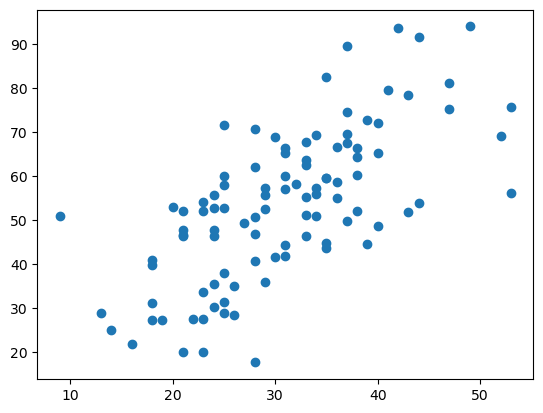

<Figure size 640x480 with 0 Axes>

In [31]:
plt.scatter(df.completed, df.score)
plt.show()
plt.clf()

#### Interpretation: There appears to be a positive correlation between the completed and score variables. As the values of completed increase, the values of score also tend to increase. This suggests that higher completion rates are associated with higher scores.

# Linear Regression to predict `score` based on prior lessons `completed`:

In [32]:
model = sm.OLS.from_formula('score ~ completed', data = df)
results = model.fit()
print(results.params)

Intercept    13.214113
completed     1.306826
dtype: float64


#### Conslusion: The Linear Regression analysis suggest a statistically significant positive relationship between the number of `completed` tasks and the `scores` achieved.
#### i) Intercept interpretation:
#### A learner who has previously `completed` 0 content items is expected to earn a quiz `score` of 13.2 points.

#### ii) Slope interpretation:
#### Students who have `completed` one additional prior content item are expected to `score` 1.3 points higher on the quiz.

# Plotting scatter plot with the line on top:

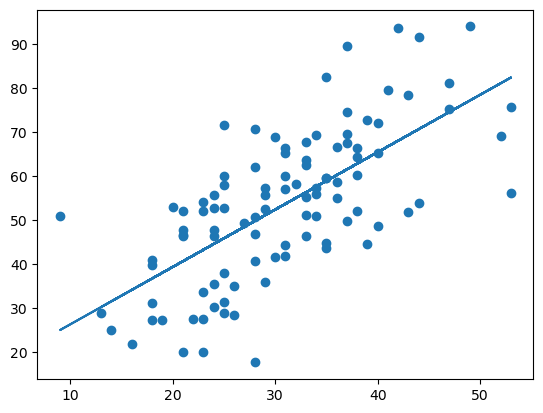

<Figure size 640x480 with 0 Axes>

In [33]:
plt.scatter(df.completed, df.score)
plt.plot(df.completed, results.predict(df))
plt.show()
plt.clf()

## Model to calculate the predicted quiz score for a learner who has previously completed 20 other content items.

In [34]:
newdata = {'completed':[20]}
pred20 = results.predict(newdata)
print('predicted score for learner who has completed 20 prior lessons: ', pred20)

predicted score for learner who has completed 20 prior lessons:  0    39.350625
dtype: float64


## Calculating the fitted values for the model

In [37]:
fitted_values = results.predict(df)

# Calculate the residuals for the model

In [39]:
residuals = df.score - fitted_values

# Check the normality assumption for linear regression

In [40]:
# by plotting a histogram of the residuals

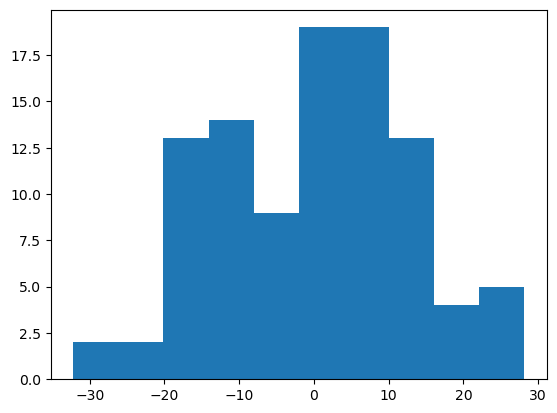

<Figure size 640x480 with 0 Axes>

In [46]:
plt.hist(residuals)
plt.show()
plt.clf()

### Conclusion: The residuals appear to be approximately normally distributed. Therefore, the normal assumption is met.

# Check the homoscedasticity assumption for linear regression

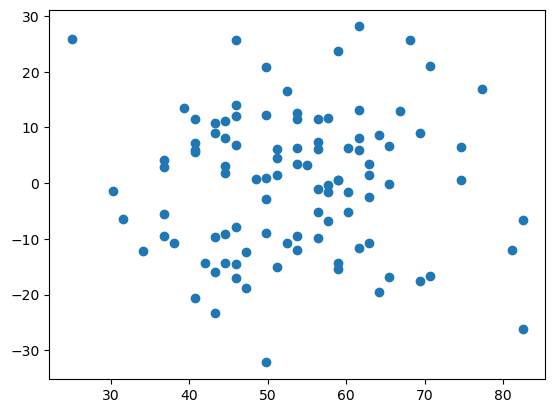

<Figure size 640x480 with 0 Axes>

In [47]:
plt.scatter(fitted_values, residuals)
plt.show()
plt.clf()

### Conclusion: There is no pattern in this plot; the homoscedasticity assumption is met.

# Do learners who take lesson A or B perform better on the quiz?
## Creating a boxplot of score vs lesson:

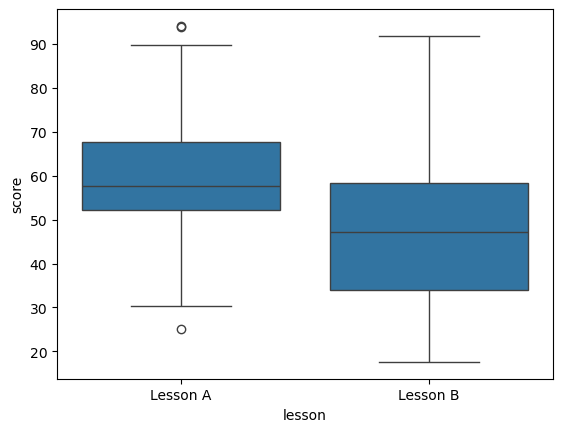

<Figure size 640x480 with 0 Axes>

In [49]:
sns.boxplot(x = 'lesson', y = 'score', data = df)
plt.show()
plt.clf()

### Conclusion: The overall trend suggests that Lesson A may be more effective in helping learners achieve higher scores, but the variability indicates that not all learners benefited equally.

# Fit a Linear Regression to predict score based on which lesson they took

In [50]:
model = sm.OLS.from_formula('score ~ lesson', df)
results = model.fit()
print(results.params)

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


### Conclusion: The linear regression analysis suggests that the lesson taken has a significant impact on learner scores. Specifically, learners who took Lesson B scored lower on average compared to those who took Lesson A.
### Specifically, learners who took Lesson B are expected to score approximately 11.64 points lower than those who took Lesson A, holding all else constant.

# Calculating mean quiz `scores` for learners who took `lesson A & B`:

In [51]:
mean_score_lessonA = np.mean(df.score[df.lesson == 'Lesson A'])
mean_score_lessonB = np.mean(df.score[df.lesson == 'Lesson B'])
print('Mean score (A): ', mean_score_lessonA)
print('Mean score (B): ', mean_score_lessonB)
print('Mean score difference: ', mean_score_lessonA - mean_score_lessonB)

Mean score (A):  59.220000000000006
Mean score (B):  47.578
Mean score difference:  11.642000000000003


### Conclusion: The results highlight a significant difference in performance between the two lessons. Learners who took Lesson A performed better on average compared to those who took Lesson B. This information can be useful for educators to evaluate the effectiveness of the lessons and consider potential improvements for Lesson B to enhance learner outcomes.

# Using `sns.lmplot()` to plot `score` vs. `completed` colored by `lesson`

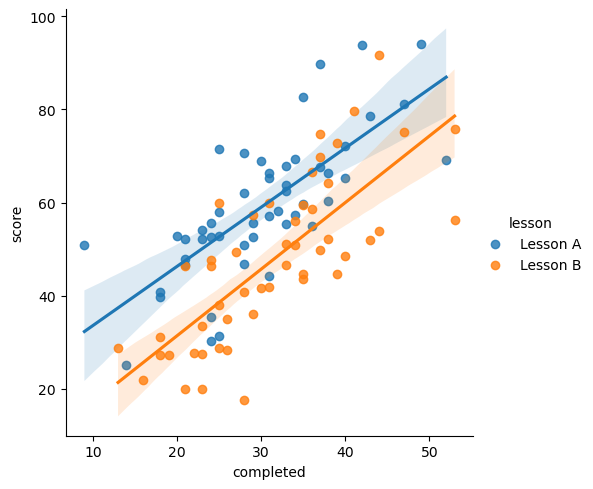

In [53]:
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = df)
plt.show()

## Conclusion: The plot effectively illustrates the relationship between task completion and quiz scores, highlighting that learners who completed more tasks generally performed better. Additionally, it suggests that Lesson A is more effective in achieving higher scores compared to Lesson B, as indicated by the higher regression line and tighter clustering of scores. 